In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [18]:
df = pd.read_csv('Iris.csv')
df.head()
df.shape
df = df.drop(columns=['Id'], axis=1)
species = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
df['SpeciesNo'] = df['Species']
df['SpeciesNo'] = [species[i] for i in df.SpeciesNo]
df.sample(5)
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,SpeciesNo
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [19]:
print(df.isnull().sum())
print(df.duplicated().sum())
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:4], df['SpeciesNo'], train_size=0.8, random_state=4)
df = pd.DataFrame(x_train)

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
SpeciesNo        0
dtype: int64
3


In [20]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(df)
kmeans.labels_
kmeans.cluster_centers_
print(kmeans.inertia_)
testPredict = kmeans.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, testPredict) * 100


63.360123249299726


86.66666666666667

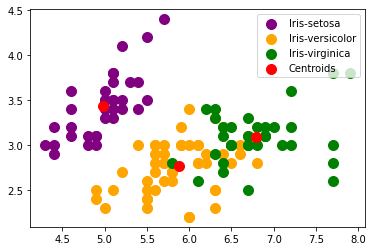

In [21]:
x = df.values
y_kmeans = kmeans.fit_predict(x)
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolor')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

Accuracy is maximum when number of clusters is 3 which is 86.66666666666667


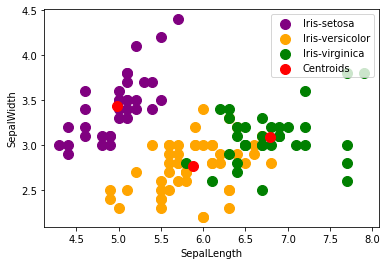

In [30]:
lst = []
wcss = []
for i in range(1, 11):
	kmeans = KMeans(n_clusters=i, random_state=0).fit(df)
	kmeans.labels_
	kmeans.cluster_centers_
	wcss.append(kmeans.inertia_)
	testPredict = kmeans.predict(x_test)
	from sklearn.metrics import accuracy_score
	acc = accuracy_score(y_test, testPredict) * 100
	lst.append([i, acc, kmeans])

abc = max(lst, key=lambda x: x[1])
print(f"Accuracy is maximum when number of clusters is {abc[0]} which is {abc[1]}")
kmeans = abc[2]
x = df.values
y_kmeans = kmeans.fit_predict(x)
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolor')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')

plt.legend()

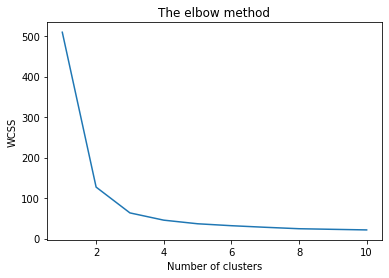

In [23]:
plt.plot(range(1,11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [24]:
petallength = float(input("Enter petal length in cm: "))
sepallength = float(input("Enter sepal length in cm: "))
petalwidth = float(input("Enter petal width in cm: "))
sepalwidth = float(input("Enter sepal width in cm: "))

print(f"""
petalLength: {petallength}, 
sepallength: {sepallength}, 
petalwidth: {petalwidth}, 
sepalwidth: {sepalwidth}
""")

test = [[sepallength, sepalwidth, petallength, petalwidth]]
y = kmeans.predict(test)
if y[0] == 0:
	print('Iris-setosa')
elif y[0] == 1:
	print('Iris-versicolor')
elif y[0] == 2:
	print('Iris-virginica')

ValueError: could not convert string to float: ''